# Using Convolutional Neural Network For Image Classification (CIFAR10 Dataset)

# Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.image import resize
from keras import regularizers
from functools import partial

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB0

from keras.applications.xception import preprocess_input as xception_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load and Prepare Data

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

#Concatenate the default splitted data
X = np.concatenate((X_train,  X_test))
y = np.concatenate((y_train, y_test))

#Convert Labels into One-hot-Encoding format
y = keras.utils.to_categorical(y, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Now I split the data into training set and test set and standardize the data to put all columns in the same scale.

In [ ]:
#Split the data into training set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

X_train_full, X_test = X_train_full/255.0, X_test/255.0

#Split the training data into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state = 42)

In [ ]:
X_train.shape

(43350, 32, 32, 3)

## Define Convolutional Neural Network

In [ ]:
DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="SAME",
    kernel_initializer="he_normal"
)

model = keras.models.Sequential([
    # لایه اول
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    # بلوک دوم
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    # بلوک سوم
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),

    # لایه چگال
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),

    # خروجی
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3109 - loss: 1.9482 - val_accuracy: 0.5827 - val_loss: 1.1791
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5370 - loss: 1.2984 - val_accuracy: 0.6584 - val_loss: 0.9856
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6446 - loss: 1.0186 - val_accuracy: 0.7098 - val_loss: 0.8751
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6983 - loss: 0.8741 - val_accuracy: 0.7458 - val_loss: 0.7831
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7428 - loss: 0.7513 - val_accuracy: 0.7711 - val_loss: 0.6967
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7785 - loss: 0.6514 - val_accuracy: 0.7869 - val_loss: 0.6423
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8146 - loss: 0.5550 - val_accuracy: 0.7871 - val_loss: 0.6408
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8338 - loss: 0.4

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("CNN Model - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8152 - loss: 1.1441
CNN Model - Test Accuracy: 0.820111095905304 , Test Loss: 1.1204874515533447


**Training Time and Accuracy Comparison:**

The deep convolutional network required **482.60 seconds** to train, which is more than twice the training time of the dense SELU-based model (**223.80 seconds**). However, this increase in training time led to a significant improvement in performance: the test accuracy rose from **51.4%** (SELU model) to **82.0%** (CNN model).


If we exclude the pre-trained transfer learning models from the previous chapter and focus only on the models built from scratch, the best accuracy (53%) was achieved by a dense model using the SELU activation function and dropout for regularization.
However, the CNN model reached a significantly higher test accuracy of 82%, clearly demonstrating that deep convolutional networks are much more effective for image-related tasks due to their ability to learn spatial and hierarchical features efficiently.

## Compare ExponentialDecay with OneCycle Scheduling

### ExponentialDecay

In [ ]:
#ِDefine model with ExponentialDecay Learning Rate Scheduling

DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="SAME",
    kernel_initializer="he_normal"
)

model_with_ExponentialDecay_lr = keras.models.Sequential([
    # Block 1
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    # Block 2
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    # Block 3
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),

    # Dense Layer
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),

    # Output
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 1e-3,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

model_with_ExponentialDecay_lr.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = lr_schedule), metrics=["accuracy"])

In [ ]:
start = time.time()
history2 = model_with_ExponentialDecay_lr.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start

print()
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3161 - loss: 1.9420 - val_accuracy: 0.5497 - val_loss: 1.2551
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5264 - loss: 1.3157 - val_accuracy: 0.6735 - val_loss: 0.9476
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6273 - loss: 1.0517 - val_accuracy: 0.7226 - val_loss: 0.7836
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6896 - loss: 0.8995 - val_accuracy: 0.7380 - val_loss: 0.7596
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7382 - loss: 0.7726 - val_accuracy: 0.7767 - val_loss: 0.6686
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7688 - loss: 0.6747 - val_accuracy: 0.7737 - val_loss: 0.6803
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8061 - loss: 0.5810 - val_accuracy: 0.7888 - val_loss: 0.6550
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8234 - loss: 0.517

In [ ]:
test_loss, test_accuracy = model_with_ExponentialDecay_lr.evaluate(X_test, y_test)

print("CNN Model using ExponentialDecay - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 1.3181
CNN Model using ExponentialDecay - Test Accuracy: 0.8287777900695801 , Test Loss: 1.3124486207962036


### OneCycle Learning Rate Scheduling

In [ ]:
class Exp_lr(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.lr = []
        self.loss = []

    def on_epoch_begin(self, epoch, logs=None):
        # Initialize previous loss at the beginning of each epoch
        self.previous_loss = 0.0

    def on_batch_end(self, batch, logs=None):
        # Compute adjusted (non-averaged) loss based on batch index
        current_loss = logs["loss"] * (batch + 1) - self.previous_loss * batch
        self.previous_loss = logs["loss"]

        # Save current learning rate and calculated loss
        self.lr.append(self.model.optimizer.learning_rate.numpy())
        self.loss.append(current_loss)

        # Update learning rate with exponential increase
        new_lr = self.model.optimizer.learning_rate * self.factor
        self.model.optimizer.learning_rate.assign(new_lr)


In [ ]:
def search_lr_loss(model, X, y, epochs=1, batch_size=32, min_lr=1e-7, max_lr=10):
    # Save original model weights to restore later
    original_weights = model.get_weights()

    # Save the original learning rate to restore later
    initial_lr = model.optimizer.learning_rate.numpy()

    # Set the initial learning rate to the minimum value
    model.optimizer.learning_rate.assign(min_lr)

    # Calculate the multiplicative factor to exponentially increase the learning rate
    iterations = int(np.ceil(len(X) / batch_size)) * epochs
    factor = np.exp(np.log(max_lr / min_lr) / iterations)

    # Initialize the custom callback to track LR and loss
    exp_callback = Exp_lr(factor)

    # Train for a small number of epochs (usually 1) to observe the LR vs Loss trend
    model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_callback], verbose=0)

    # Restore the original model weights and learning rate
    model.set_weights(original_weights)
    model.optimizer.learning_rate.assign(initial_lr)

    # Return the recorded learning rates and corresponding losses
    return exp_callback.lr, exp_callback.loss

In [ ]:
#ِDefine model with OneCycle Learning Rate Scheduling

DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="SAME",
    kernel_initializer="he_normal"
)

model_with_OneCycle_lr = keras.models.Sequential([
    # Block 1
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    # Block 2
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    # Block 3
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),

    # Dense Layer
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),

    # Output
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model_with_OneCycle_lr.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

In [ ]:
lrs, losses = search_lr_loss(model_with_OneCycle_lr, X_train, y_train)

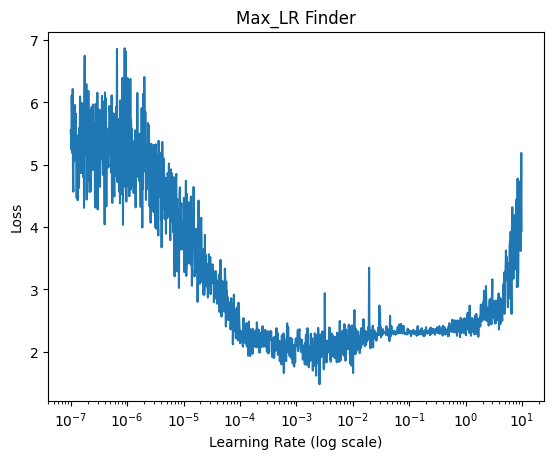

In [ ]:
plt.plot(lrs, losses)
plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Loss")
plt.title("Max_LR Finder")
plt.show()

The optimal value for max_lr was determined to be 1e-3, as higher values caused the loss to become unstable and start increasing.

#### Define OneCycle Learning Rate Scheduler

In [ ]:
class OneCycleLR(keras.callbacks.Callback):
  def __init__(self, iterations, max_lr, init_lr=None,
               final_steps=None, final_lr=None):
    self.iterations = iterations
    self.max_lr = max_lr
    self.init_lr = init_lr or max_lr / 25
    self.final_steps = final_steps or int(iterations/10)+1
    self.half_iterations = int((iterations - self.final_steps)/2)
    self.final_lr = final_lr or self.init_lr/1000
    self.iteration = 0

  def interpolation(self, y2, y1, x2, x1):
    return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1

  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iterations:
      lr = self.interpolation(self.max_lr, self.init_lr,
                              self.half_iterations, 0)
    elif self.iteration < 2*self.half_iterations:
      lr = self.interpolation(self.init_lr, self.max_lr,
                              2*self.half_iterations, self.half_iterations)
    else:
      lr = self.interpolation(self.final_lr, self.init_lr,
                              self.iterations, 2*self.half_iterations)
    self.iteration += 1
    self.model.optimizer.learning_rate.assign(lr)

In [ ]:
epochs = 50
batch_size = 32

iterations = int(X_train.shape[0]//batch_size)*epochs

one_cycle_lr = OneCycleLR(iterations, max_lr=0.001)

model_with_OneCycle_lr.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), metrics=["accuracy"])


start = time.time()
history_one_cycle = model_with_OneCycle_lr.fit(X_train, y_train,
                             validation_split = 0.15,
                             epochs = epochs,
                             callbacks = [one_cycle_lr])
end = time.time()

training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.2040 - loss: 2.5575 - val_accuracy: 0.4193 - val_loss: 1.6097
Epoch 2/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3916 - loss: 1.6857 - val_accuracy: 0.5039 - val_loss: 1.3775
Epoch 3/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4790 - loss: 1.4552 - val_accuracy: 0.5691 - val_loss: 1.2211
Epoch 4/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5451 - loss: 1.2920 - val_accuracy: 0.5996 - val_loss: 1.1187
Epoch 5/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5828 - loss: 1.1582 - val_accuracy: 0.6183 - val_loss: 1.0760
Epoch 6/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6326 - loss: 1.0425 - val_accuracy: 0.6706 - val_loss: 0.9501
Epoch 7/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6673 - loss: 0.9492 - val_accuracy: 0.6769 - val_loss: 0.9295
Epoch 8/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6946 - loss: 0.86

In [ ]:
test_loss, test_accuracy = model_with_OneCycle_lr.evaluate(X_test, y_test)

print("CNN Model using OneCycle Learning Rate Scheduler - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8187 - loss: 1.4239
CNN Model using OneCycle Learning Rate Scheduler - Test Accuracy: 0.8182222247123718 , Test Loss: 1.3893647193908691


| Scheduler        | Final Train Acc | Final Val Acc | Final Test Acc | Final Test Loss | Training Time (s) |
| ---------------- | --------------- | ------------- | -------------- | --------------- | ----------------- |
| **No Scheduler** | 0.9831          | 0.8199        | **0.8201**     | 1.1205          | **493.15**        |
| **Exponential**  | 0.9878          | **0.8308**    | **0.8288**     | **1.3124**      | 479.48            |
| **OneCycle**     | **0.9952**      | 0.8179        | 0.8182         | 1.3894          | **471.76**        |



We compared three learning rate scheduling strategies: no scheduler, Exponential Decay, and OneCycle.

The Exponential Decay strategy achieved the highest test accuracy (82.88%), showing better generalization to unseen data.

The OneCycle method provided the fastest training time (471.76s) and highest training accuracy (99.52%), but resulted in slightly lower test accuracy (81.82%), possibly due to overfitting.

The model trained without any scheduler reached a test accuracy of 82.01%, but had the longest training time (493.15s).

Overall, learning rate schedulers helped reduce training time by up to 21 seconds (4.3%), with Exponential Decay offering the best balance between accuracy and efficiency in our experiments.

## Investigate the Effect of Removing Pooling Layer on Model Performance

In [ ]:
#ِDefine model without using pooling layer

DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="SAME",
    kernel_initializer="he_normal"
)

model_without_pooling_layer = keras.models.Sequential([
    # Block 1
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),

    # Block 2
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),

    # Block 3
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),

    # Dense Layer
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),

    # Output
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model_without_pooling_layer.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

In [ ]:
start = time.time()
history3 = model_without_pooling_layer.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start

print()
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.1014 - loss: 2.9476 - val_accuracy: 0.1018 - val_loss: 2.3027
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.1007 - loss: 2.3090 - val_accuracy: 0.0974 - val_loss: 2.3029
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3028
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3028
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.1020 - val_loss: 2.3026
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.1020 - val_loss: 2.3026
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1005 - val_loss: 2.3027
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.1006 -

In [ ]:
test_loss, test_accuracy = model_without_pooling_layer.evaluate(X_test, y_test)

print("CNN Model without pooling layer - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0915 - loss: 2.3221
CNN Model without pooling layer - Test Accuracy: 0.09533333033323288 , Test Loss: 2.310723066329956



In this experiment, we removed all pooling layers from the CNN model to evaluate their impact on training performance and accuracy.

Without pooling, the model failed to converge and its accuracy degraded drastically and remained around 10% — equivalent to random guessing on the CIFAR-10 dataset.
The training time also increased significantly from ~490 seconds (with pooling) to over 1895 seconds (without pooling).

This behavior is expected, as pooling layers reduce spatial dimensions and help extract translation-invariant features. Without them, the model processes large feature maps throughout all layers, leading to very high-dimensional inputs to the dense layers, which makes learning difficult and inefficient.

In [ ]:
DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="same",
    kernel_initializer="he_normal"
)

model_without_pooling_layer2 = keras.models.Sequential([
    # Block 1
    DefaultConv2D(filters=32, kernel_size=3, strides=1, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32, strides=2),  # downsampling

    # Block 2
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64, strides=1),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64, strides=2),  # downsampling

    # Block 3
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128, strides=1),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128, strides=2),  # downsampling

    keras.layers.Flatten(),

    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])


In [ ]:
model_without_pooling_layer2.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

In [ ]:
start = time.time()
history4 = model_without_pooling_layer2.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start

print()
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3011 - loss: 1.9156 - val_accuracy: 0.5359 - val_loss: 1.2985
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4899 - loss: 1.4008 - val_accuracy: 0.6135 - val_loss: 1.0552
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6066 - loss: 1.1111 - val_accuracy: 0.6710 - val_loss: 0.9309
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6726 - loss: 0.9467 - val_accuracy: 0.7150 - val_loss: 0.8425
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7204 - loss: 0.8093 - val_accuracy: 0.7169 - val_loss: 0.8422
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7632 - loss: 0.6933 - val_accuracy: 0.7156 - val_loss: 0.8429
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7939 - loss: 0.5958 - val_accuracy: 0.7292 - val_loss: 0.8309
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8213 - loss: 0.5113

In [ ]:
test_loss, test_accuracy = model_without_pooling_layer2.evaluate(X_test, y_test)

print("CNN Model without pooling layer - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7515 - loss: 1.7936
CNN Model without pooling layer - Test Accuracy: 0.7545555830001831 , Test Loss: 1.7923561334609985


In this follow-up experiment, we removed all pooling layers from the CNN, but used convolutional layers with stride = 2 to downsample the feature maps.

Unlike the previous configuration where pooling was naively removed (and the model failed to learn), this architecture successfully converged and achieved the following results:

Test Accuracy: ~75.4%

Training Accuracy: ~97.9%

Validation Accuracy: ~77.5%

This improvement shows that strided convolutions can effectively replace pooling layers for spatial downsampling while still allowing the network to learn hierarchical features. Compared to the no-pooling baseline (where pooling layers were removed without any structural change), strided convolutions not only improved the accuracy (from ~10% to 75.4%) but also significantly reduced the training time (from 1895 seconds to 447 seconds).

This model with no pooling layers and strided convolutions (stride = 2) successfully converged with a training time of 447 seconds, which is slightly faster than the standard model with pooling layers (482.6 seconds). However, it showed lower accuracy on both the validation set and test set compared to the standard pooling-based model (which achieved ~82% test accuracy).


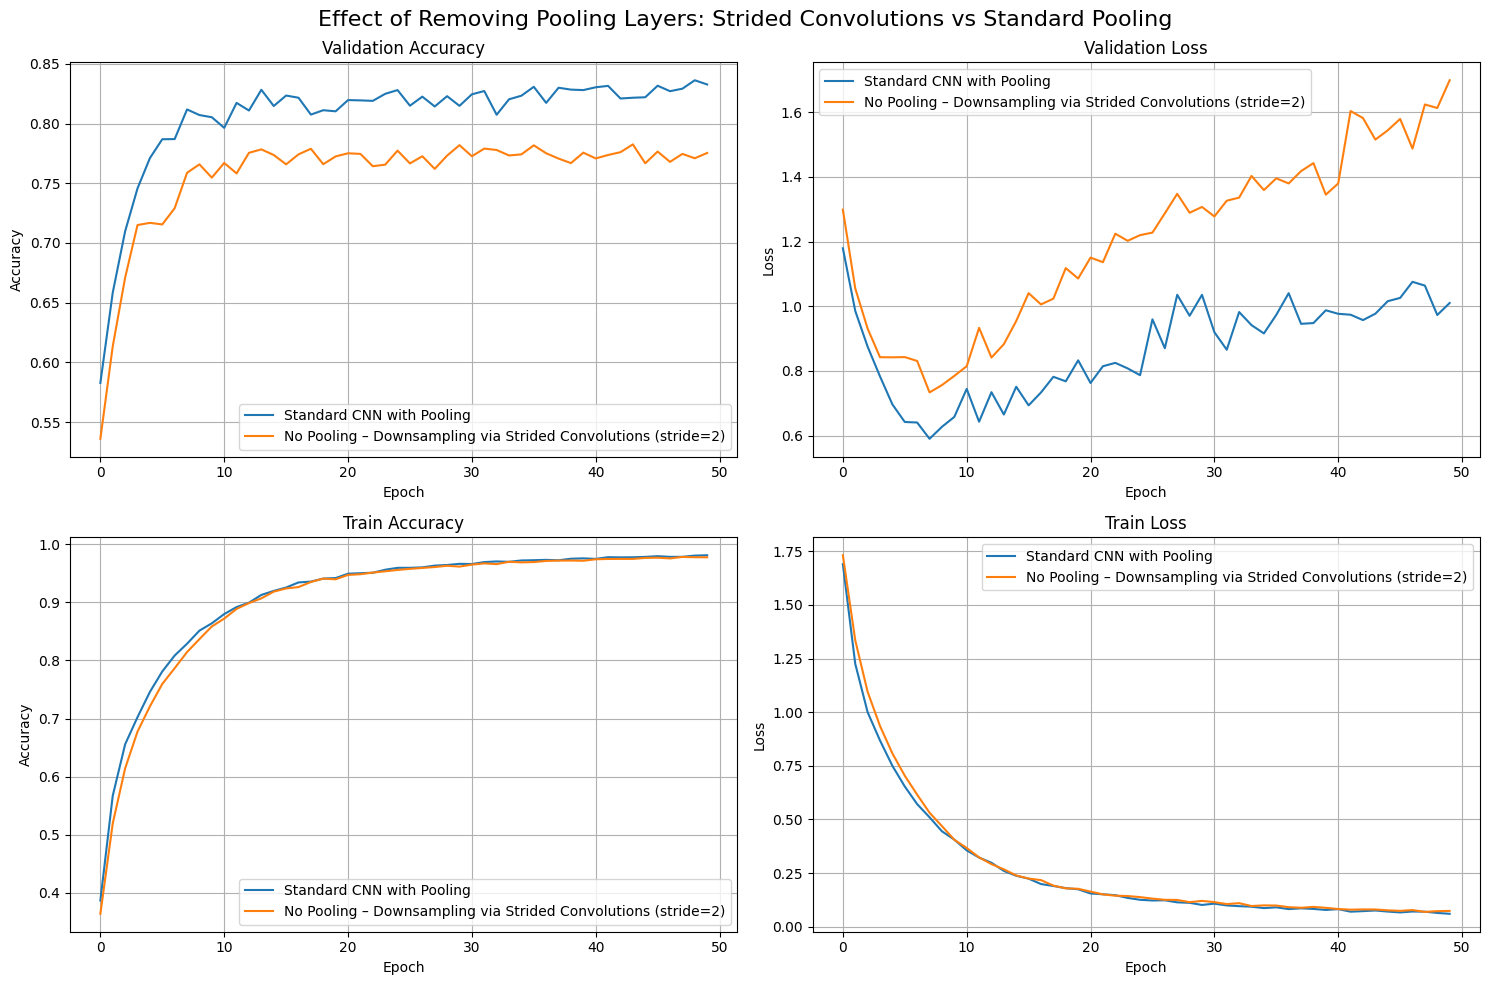

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Effect of Removing Pooling Layers: Strided Convolutions vs Standard Pooling", fontsize=16)

# Validation Accuracy
plt.subplot(2, 2, 1)

plt.plot(history.history['val_accuracy'], label='Standard CNN with Pooling')
plt.plot(history4.history['val_accuracy'], label= 'No Pooling – Downsampling via Strided Convolutions (stride=2)')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(2, 2, 2)

plt.plot(history.history['val_loss'], label= 'Standard CNN with Pooling')
plt.plot(history4.history['val_loss'], label= 'No Pooling – Downsampling via Strided Convolutions (stride=2)')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Train Accuracy
plt.subplot(2, 2, 3)

plt.plot(history.history['accuracy'], label= 'Standard CNN with Pooling')
plt.plot(history4.history['accuracy'], label= 'No Pooling – Downsampling via Strided Convolutions (stride=2)')

plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Train Loss
plt.subplot(2, 2, 4)

plt.plot(history.history['loss'], label= 'Standard CNN with Pooling')
plt.plot(history4.history['loss'], label= 'No Pooling – Downsampling via Strided Convolutions (stride=2)')

plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Investigate the Effect of Changing Pooling Stride on Model Performance

### MaxPooling with Strides = 2

In [ ]:
#ِDefine model with Strides = 2 MaxPooling

DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="SAME",
    kernel_initializer="he_normal"
)

model_with_stride2_maxpooling = keras.models.Sequential([
    # Block 1
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # Block 2
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    # Block 3
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Flatten(),

    # Dense Layer
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),

    # Output
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model_with_stride2_maxpooling.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

In [ ]:
start = time.time()
history_stride2_maxpooling = model_with_stride2_maxpooling.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3122 - loss: 1.9509 - val_accuracy: 0.4997 - val_loss: 1.3675
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5206 - loss: 1.3250 - val_accuracy: 0.6641 - val_loss: 0.9881
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6305 - loss: 1.0669 - val_accuracy: 0.6681 - val_loss: 0.9905
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6895 - loss: 0.9061 - val_accuracy: 0.7508 - val_loss: 0.7318
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7420 - loss: 0.7717 - val_accuracy: 0.7550 - val_loss: 0.7272
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7786 - loss: 0.6607 - val_accuracy: 0.7899 - val_loss: 0.6495
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8092 - loss: 0.5772 - val_accuracy: 0.7942 - val_loss: 0.6097
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8290 - loss: 0.498

In [ ]:
test_loss, test_accuracy = model_with_stride2_maxpooling.evaluate(X_test, y_test)

print("CNN Model with Strides = 2 MaxPooling- Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8216 - loss: 1.1531
CNN Model with Strides = 2 MaxPooling- Test Accuracy: 0.81977778673172 , Test Loss: 1.1434326171875


### MaxPooling with Strides = 4

In [ ]:
#ِDefine model with Strides = 4 MaxPooling

DefaultConv2D = partial(
    keras.layers.Conv2D,
    kernel_size=3,
    activation='relu',
    padding="SAME",
    kernel_initializer="he_normal"
)

model_with_stride4_maxpooling = keras.models.Sequential([
    # Block 1
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=32),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=4),

    # Block 2
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=4),

    # Block 3
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=4),

    keras.layers.Flatten(),

    # Dense Layer
    keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),

    # Output
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model_with_stride4_maxpooling.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 1e-5), metrics=["accuracy"])

In [ ]:
start = time.time()
history_stride4_maxpooling = model_with_stride4_maxpooling.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1182 - loss: 4.2398 - val_accuracy: 0.2383 - val_loss: 2.2163
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1805 - loss: 2.9503 - val_accuracy: 0.2932 - val_loss: 2.0004
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2161 - loss: 2.4451 - val_accuracy: 0.3136 - val_loss: 1.8975
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2532 - loss: 2.1820 - val_accuracy: 0.3421 - val_loss: 1.8350
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2748 - loss: 2.0479 - val_accuracy: 0.3644 - val_loss: 1.7860
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3007 - loss: 1.9497 - val_accuracy: 0.3762 - val_loss: 1.7385
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3226 - loss: 1.8900 - val_accuracy: 0.3956 - val_loss: 1.6947
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3390 - loss: 1.8409 

In [ ]:
test_loss, test_accuracy = model_with_stride4_maxpooling.evaluate(X_test, y_test)

print("CNN Model with Strides = 4 MaxPooling- Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7288 - loss: 1.6420
CNN Model with Strides = 4 MaxPooling- Test Accuracy: 0.7244444489479065 , Test Loss: 1.6759244203567505


Increasing the stride in MaxPooling from 2 to 4 significantly reduced test accuracy and increased loss, despite slightly reducing training time.
This is because a higher stride aggressively reduces spatial dimensions, discarding too much important spatial information in early layers — which degrades learning capacity.
Therefore, stride=2 provides a better balance between computational efficiency and representational power, while stride=4 leads to underfitting due to excessive downsampling.



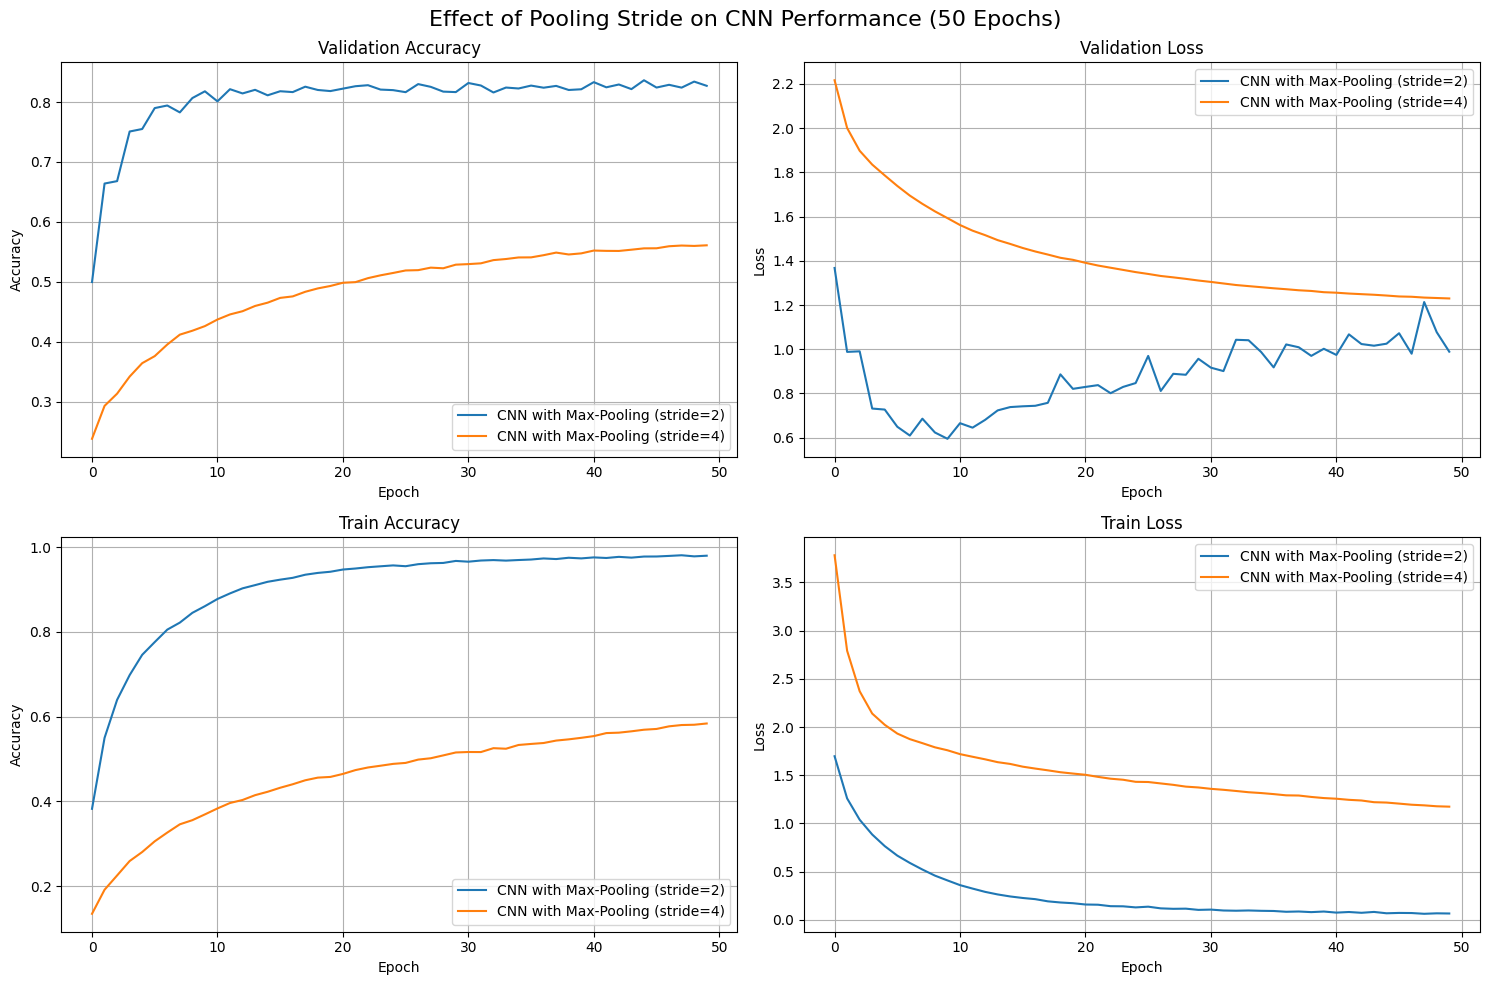

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Effect of Pooling Stride on CNN Performance (50 Epochs)", fontsize=16)

# Validation Accuracy
plt.subplot(2, 2, 1)

plt.plot(history_stride2_maxpooling.history['val_accuracy'], label='CNN with Max-Pooling (stride=2)')
plt.plot(history_stride4_maxpooling.history['val_accuracy'], label= 'CNN with Max-Pooling (stride=4)')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(2, 2, 2)

plt.plot(history_stride2_maxpooling.history['val_loss'], label= 'CNN with Max-Pooling (stride=2)')
plt.plot(history_stride4_maxpooling.history['val_loss'], label= 'CNN with Max-Pooling (stride=4)')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Train Accuracy
plt.subplot(2, 2, 3)

plt.plot(history_stride2_maxpooling.history['accuracy'], label= 'CNN with Max-Pooling (stride=2)')
plt.plot(history_stride4_maxpooling.history['accuracy'], label= 'CNN with Max-Pooling (stride=4)')

plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Train Loss
plt.subplot(2, 2, 4)

plt.plot(history_stride2_maxpooling.history['loss'], label= 'CNN with Max-Pooling (stride=2)')
plt.plot(history_stride4_maxpooling.history['loss'], label= 'CNN with Max-Pooling (stride=4)')

plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Xception Model

In [ ]:
# Select a small subset of the data to avoid OOM (Out Of Memory) error `ResourceExhaustedError`
# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

X_train_small = X_train[:1700]
y_train_small = y_train[:1700]

X_test_small = X_test[:300]
y_test_small = y_test[:300]

In [ ]:
# make data ready for xception model
X_train_resized = tf.image.resize(X_train_small, [299, 299])
X_test_resized  = tf.image.resize(X_test_small,  [299, 299])

X_train_preprocessed = xception_preprocess(X_train_resized)
X_test_preprocessed  = xception_preprocess(X_test_resized)

In [ ]:
base_model = keras.applications.Xception(include_top=False)

In [ ]:
# freeze all the Xception model layers
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
xception_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# train the model
xception_history = xception_model.fit(X_train_preprocessed, y_train_small, epochs=50, validation_split=0.15)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 799ms/step - accuracy: 0.4348 - loss: 1.8561 - val_accuracy: 0.7961 - val_loss: 0.9152
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 283ms/step - accuracy: 0.8341 - loss: 0.7584 - val_accuracy: 0.8392 - val_loss: 0.6496
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - accuracy: 0.8552 - loss: 0.5521 - val_accuracy: 0.8471 - val_loss: 0.5723
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.9005 - loss: 0.4422 - val_accuracy: 0.8431 - val_loss: 0.5327
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.9077 - loss: 0.3921 - val_accuracy: 0.8314 - val_loss: 0.4973
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - accuracy: 0.9050 - loss: 0.3480 - val_accuracy: 0.8353 - val_loss: 0.4918
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.9326 - loss: 0.2812 - val_accuracy: 0.8314 - val_loss: 0.4900
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9337 - loss: 0.2902 - val_accu

In [ ]:
test_loss, test_accuracy = xception_model.evaluate(X_test_preprocessed, y_test_small)

print("Xception Model with All Frozen Layers - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 836ms/step - accuracy: 0.8899 - loss: 0.3866
Xception Model with All Frozen Layers - Test Accuracy: 0.8666666746139526 , Test Loss: 0.42349833250045776


### Unfreeze One Layer of Xception Model

In [ ]:
# unfreeze last layer of Xception model
for layer in base_model.layers[:-1]:
  layer.trainable = False

base_model.layers[-1].trainable =  True

In [ ]:
xception_model2 = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
xception_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# train the model
xception_history2 = xception_model2.fit(X_train_preprocessed, y_train_small, epochs=50, validation_split=0.15)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 430ms/step - accuracy: 0.4549 - loss: 1.8188 - val_accuracy: 0.7882 - val_loss: 0.8945
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.8303 - loss: 0.7608 - val_accuracy: 0.8235 - val_loss: 0.6457
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.8630 - loss: 0.5529 - val_accuracy: 0.8118 - val_loss: 0.5766
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.8786 - loss: 0.4763 - val_accuracy: 0.8392 - val_loss: 0.5373
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.9140 - loss: 0.3746 - val_accuracy: 0.8392 - val_loss: 0.5142
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.9099 - loss: 0.3506 - val_accuracy: 0.8431 - val_loss: 0.4971
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.9266 - loss: 0.3033 - val_accuracy: 0.8353 - val_loss: 0.4826
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.9359 - loss: 0.2707 - val_accu

In [ ]:
test_loss, test_accuracy = xception_model2.evaluate(X_test_preprocessed, y_test_small)

print("Xception Model2 with One Trainable Layer - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 435ms/step - accuracy: 0.8985 - loss: 0.3848
Xception Model2 with One Trainable Layer - Test Accuracy: 0.8799999952316284 , Test Loss: 0.42233824729919434


We compared two Xception-based models on CIFAR-10:

- Model 1: All layers frozen
→ Test Accuracy: 86.67%

- Model 2: Last layer trainable
→ Test Accuracy: 88.00%

Conclusion:
Unfreezing just one layer of the base model led to a slight improvement in generalization. Fine-tuning even a small part of a pre-trained model can help adapt it better to the target dataset.

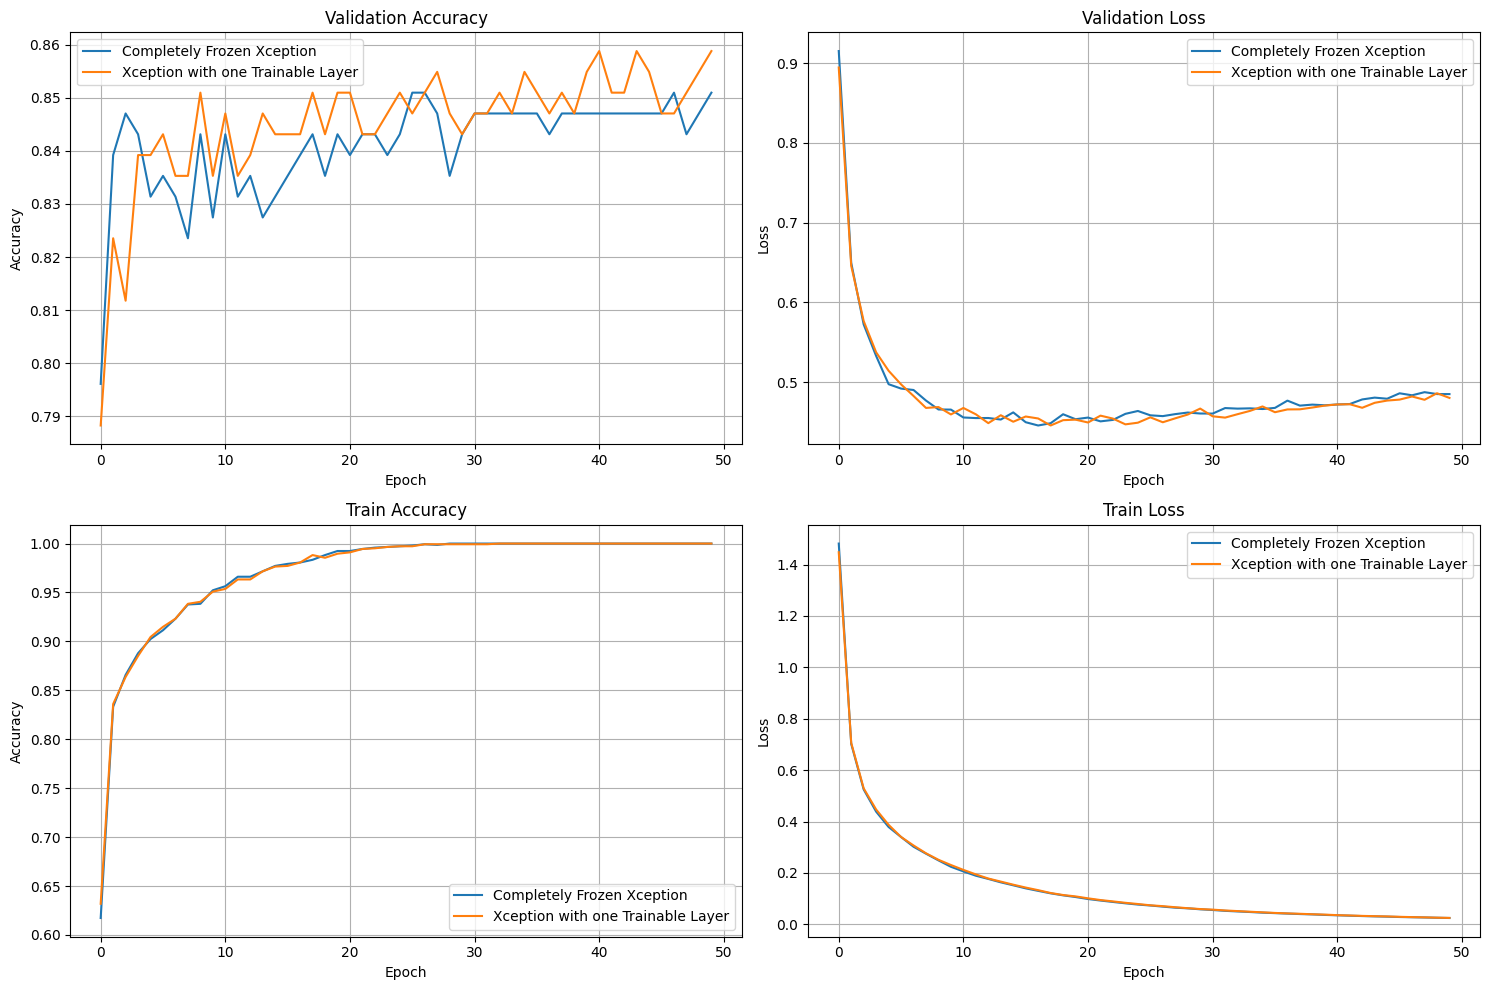

In [ ]:
plt.figure(figsize=(15, 10))

# Validation Accuracy
plt.subplot(2, 2, 1)

plt.plot(xception_history.history['val_accuracy'], label='Completely Frozen Xception')
plt.plot(xception_history2.history['val_accuracy'], label= 'Xception with one Trainable Layer')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(2, 2, 2)

plt.plot(xception_history.history['val_loss'], label= 'Completely Frozen Xception')
plt.plot(xception_history2.history['val_loss'], label= 'Xception with one Trainable Layer')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Train Accuracy
plt.subplot(2, 2, 3)

plt.plot(xception_history.history['accuracy'], label= 'Completely Frozen Xception')
plt.plot(xception_history2.history['accuracy'], label= 'Xception with one Trainable Layer')

plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Train Loss
plt.subplot(2, 2, 4)

plt.plot(xception_history.history['loss'], label= 'Completely Frozen Xception')
plt.plot(xception_history2.history['loss'], label= 'Xception with one Trainable Layer')

plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

We can see that Xception model with one trainable layer performs slightly better than model with completely frozen layers.

### Use EfficientNetB0 as a Base Model

In [ ]:
# Resize images to 224x224 (required input size for EfficientNetB0)
X_train_resized = tf.image.resize(X_train_small, [224, 224])
X_test_resized = tf.image.resize(X_test_small, [224, 224])

# Preprocess images using EfficientNet-specific preprocessing
X_train_preprocessed = efficientnet_preprocess(X_train_resized)
X_test_preprocessed = efficientnet_preprocess(X_test_resized)

# Load EfficientNetB0 model without the top (fully-connected) layers
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze all layers except the last five layers in the base model
for layer in base_model.layers[:-5]:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True           # Make last five layers trainable

In [ ]:
# Build the final model by adding classification layers
efficientnet_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
efficientnet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
print(np.min(X_train_preprocessed), np.max(X_train_preprocessed))


0.0 255.0


In [ ]:
# Train the model
history_efficientnet_model = efficientnet_model.fit(
    X_train_preprocessed, y_train_small,
    epochs=50,
    validation_split=0.15
)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 542ms/step - accuracy: 0.2982 - loss: 2.0607 - val_accuracy: 0.6902 - val_loss: 1.3136
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.7488 - loss: 1.1375 - val_accuracy: 0.7882 - val_loss: 0.8488
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8142 - loss: 0.7591 - val_accuracy: 0.8275 - val_loss: 0.6551
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8550 - loss: 0.6203 - val_accuracy: 0.8549 - val_loss: 0.5670
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8893 - loss: 0.4875 - val_accuracy: 0.8549 - val_loss: 0.5125
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8828 - loss: 0.4515 - val_accuracy: 0.8627 - val_loss: 0.4742
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9054 - loss: 0.4013 - val_accuracy: 0.8706 - val_loss: 0.4472
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9083 - loss: 0.3482 - val_accuracy: 0.8784 -

In [ ]:
test_loss, test_accuracy = efficientnet_model.evaluate(X_test_preprocessed, y_test_small)

print("EfficientNetB0 Model - Test Accuracy:", test_accuracy, ", Test Loss:", test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 603ms/step - accuracy: 0.9158 - loss: 0.2871
EfficientNetB0 Model - Test Accuracy: 0.9066666960716248 , Test Loss: 0.29995959997177124


Additionally, the EfficientNetB0 model with its last five layers unfrozen achieved the best performance (90.67% test accuracy), outperforming both Xception variants and highlighting the benefits of deeper fine-tuning.